In [2]:
library (SCpubr)
library (Seurat)
library (tidyverse)
library (Matrix)

library (ggthemes) # For ggplot themes
source ("Scripts/Filter_Mito_Ribo.R")
source ("Scripts/ABA_patgenes_all.R")
source ("Scripts/Zhisong_summarize_clusters.R")
path_data = ''




── SCpubr 2.0.2 ────────────────────────────────────────────────────────────────

ℹ Have a look at extensive tutorials in SCpubr's book.

✔ If you use SCpubr in your research, please cite it accordingly.

★ If the package is useful to you, consider leaving a Star in the GitHub repository.

! Keep track of the package updates on Twitter (@Enblacar) or in the Official NEWS website.

♥ Happy plotting!



── Tips! ──

ℹ To remove the white and black end from continuous palettes, use: options("SCpubr.ColorPaletteEnds" = FALSE)

✖ To suppress this startup message, use: suppressPackageStartupMessages(library(SCpubr))
✖ Alternatively, you can also set the following option: options("SCpubr.verbose" = FALSE)
  And then load the package normally (and faster) as: library(SCpubr)

────────────────────────────────────────────────────────────────────────────────
Attaching SeuratObject

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr    

In [16]:
df <- readRDS(paste0(path_data, 'exp1_processed_rss_5.rds'))
df

An object of class Seurat 
43558 features across 214059 samples within 1 assay 
Active assay: RNA (43558 features, 0 variable features)
 3 dimensional reductions calculated: umap, rss, umap_rss

In [17]:
df <- subset(df, cell_line %in% c('H1', 'H9', 'WTC', 'WIBJ2'))
df

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_rss_ to umaprss_”


An object of class Seurat 
43558 features across 209902 samples within 1 assay 
Active assay: RNA (43558 features, 0 variable features)
 3 dimensional reductions calculated: umap, rss, umap_rss

In [18]:
df@meta.data$line_morphogen_batch <- paste(df@meta.data$medium_morphogen, 
                                        df@meta.data$cell_line, 
                                        df@meta.data$batch, 
                                        sep = "_")

In [19]:
avg_data <- Seurat::AverageExpression (df, group.by = "line_morphogen_batch", slot = "data")
df@meta.data$line_morphogen_batch <- factor(df@meta.data$line_morphogen_batch)


# Making a sparse matrix and giving it the colnames corresponding to each cluster (should match rownames from metadata)
avg_data <- Matrix::Matrix (avg_data$RNA, sparse = T)
colnames (avg_data) <- NULL
colnames (avg_data) <- levels (df$line_morphogen_batch)
length(colnames (avg_data))



[1] 192

In [20]:
# Aggregate expression of count data (needed to FindVariableFeatures)
aggr_counts <- Seurat::AggregateExpression (df, group.by = "line_morphogen_batch", slot = "counts")
colnames (aggr_counts)
# Making a sparse matrix and giving it the colnames corresponding to each cluster (should match rownames from metadata)
aggr_counts <- Matrix (aggr_counts$RNA, sparse = T)
colnames (aggr_counts) <- NULL
colnames (aggr_counts) <- levels (df$line_morphogen_batch)
#colnames (aggr_counts)

# Aggregating metadata values (dataframe)
summ_Cond_meta <- summarize_data_to_groups (df@meta.data, groups = df$line_morphogen_batch)
rownames (summ_Cond_meta)

NULL

[1] "CHIR_A_NIM_H1_B1"         "CHIR_A_NIM_H1_B2"        
  [3] "CHIR_A_NIM_H9_B1"         "CHIR_A_NIM_H9_B2"        
  [5] "CHIR_A_NIM_WIBJ2_B1"      "CHIR_A_NIM_WIBJ2_B2"     
  [7] "CHIR_A_NIM_WTC_B1"        "CHIR_A_NIM_WTC_B2"       
  [9] "CHIR_A_NPM_H1_B1"         "CHIR_A_NPM_H1_B2"        
 [11] "CHIR_A_NPM_H9_B1"         "CHIR_A_NPM_H9_B2"        
 [13] "CHIR_A_NPM_WIBJ2_B1"      "CHIR_A_NPM_WIBJ2_B2"     
 [15] "CHIR_A_NPM_WTC_B1"        "CHIR_A_NPM_WTC_B2"       
 [17] "CHIR_E_NIM_H1_B1"         "CHIR_E_NIM_H1_B2"        
 [19] "CHIR_E_NIM_H9_B1"         "CHIR_E_NIM_H9_B2"        
 [21] "CHIR_E_NIM_WIBJ2_B1"      "CHIR_E_NIM_WIBJ2_B2"     
 [23] "CHIR_E_NIM_WTC_B1"        "CHIR_E_NIM_WTC_B2"       
 [25] "CHIR_E_NPM_H1_B1"         "CHIR_E_NPM_H1_B2"        
 [27] "CHIR_E_NPM_H9_B1"         "CHIR_E_NPM_H9_B2"        
 [29] "CHIR_E_NPM_WIBJ2_B1"      "CHIR_E_NPM_WIBJ2_B2"     
 [31] "CHIR_E_NPM_WTC_B1"        "CHIR_E_NPM_WTC_B2"       
 [33] "CHIR_tA_NIM_H1_B1"        "CHIR_tA_NIM_H1_B2"       
 [35] "CHIR_tA_NIM_H9_B1"        "CHIR_tA_NIM_H9_B2"       
 [37] "CHIR_tA_NIM_WIBJ2_B1"     "CHIR_tA_NIM_WIBJ2_B2"    
 [39] "CHIR_tA_NIM_WTC_B1"       "CHIR_tA_NIM_WTC_B2"      
 [41] "CHIR_tA_NPM_H1_B1"        "CHIR_tA_NPM_H1_B2"       
 [43] "CHIR_tA_NPM_H9_B1"        "CHIR_tA_NPM_H9_B2"       
 [45] "CHIR_tA_NPM_WIBJ2_B1"     "CHIR_tA_NPM_WIBJ2_B2"    
 [47] "CHIR_tA_NPM_WTC_B1"       "CHIR_tA_NPM_WTC_B2"      
 [49] "CHIR_tC_NIM_H1_B1"        "CHIR_tC_NIM_H1_B2"       
 [51] "CHIR_tC_NIM_H9_B1"        "CHIR_tC_NIM_H9_B2"       
 [53] "CHIR_tC_NIM_WIBJ2_B1"     "CHIR_tC_NIM_WIBJ2_B2"    
 [55] "CHIR_tC_NIM_WTC_B1"       "CHIR_tC_NIM_WTC_B2"      
 [57] "CHIR_tC_NPM_H1_B1"        "CHIR_tC_NPM_H1_B2"       
 [59] "CHIR_tC_NPM_H9_B1"        "CHIR_tC_NPM_H9_B2"       
 [61] "CHIR_tC_NPM_WIBJ2_B1"     "CHIR_tC_NPM_WIBJ2_B2"    
 [63] "CHIR_tC_NPM_WTC_B1"       "CHIR_tC_NPM_WTC_B2"      
 [65] "CHIR_tE_NIM_H1_B1"        "CHIR_tE_NIM_H1_B2"       
 [67] "CHIR_tE_NIM_H9_B1"        "CHIR_tE_NIM_H9_B2"       
 [69] "CHIR_tE_NIM_WIBJ2_B1"     "CHIR_tE_NIM_WIBJ2_B2"    
 [71] "CHIR_tE_NIM_WTC_B1"       "CHIR_tE_NIM_WTC_B2"      
 [73] "CHIR_tE_NPM_H1_B1"        "CHIR_tE_NPM_H1_B2"       
 [75] "CHIR_tE_NPM_H9_B1"        "CHIR_tE_NPM_H9_B2"       
 [77] "CHIR_tE_NPM_WIBJ2_B1"     "CHIR_tE_NPM_WIBJ2_B2"    
 [79] "CHIR_tE_NPM_WTC_B1"       "CHIR_tE_NPM_WTC_B2"      
 [81] "Ctrl_NIM_H1_B1"           "Ctrl_NIM_H1_B2"          
 [83] "Ctrl_NIM_H9_B1"           "Ctrl_NIM_H9_B2"          
 [85] "Ctrl_NIM_WIBJ2_B1"        "Ctrl_NIM_WIBJ2_B2"       
 [87] "Ctrl_NIM_WTC_B1"          "Ctrl_NIM_WTC_B2"         
 [89] "Ctrl_NPM_H1_B1"           "Ctrl_NPM_H1_B2"          
 [91] "Ctrl_NPM_H9_B1"           "Ctrl_NPM_H9_B2"          
 [93] "Ctrl_NPM_WIBJ2_B1"        "Ctrl_NPM_WIBJ2_B2"       
 [95] "Ctrl_NPM_WTC_B1"          "Ctrl_NPM_WTC_B2"         
 [97] "FGF8_late_A_NIM_H1_B1"    "FGF8_late_A_NIM_H1_B2"   
 [99] "FGF8_late_A_NIM_H9_B1"    "FGF8_late_A_NIM_H9_B2"   
[101] "FGF8_late_A_NIM_WIBJ2_B1" "FGF8_late_A_NIM_WIBJ2_B2"
[103] "FGF8_late_A_NIM_WTC_B1"   "FGF8_late_A_NIM_WTC_B2"  
[105] "FGF8_late_A_NPM_H1_B1"    "FGF8_late_A_NPM_H1_B2"   
[107] "FGF8_late_A_NPM_H9_B1"    "FGF8_late_A_NPM_H9_B2"   
[109] "FGF8_late_A_NPM_WIBJ2_B1" "FGF8_late_A_NPM_WIBJ2_B2"
[111] "FGF8_late_A_NPM_WTC_B1"   "FGF8_late_A_NPM_WTC_B2"  
[113] "FGF8_late_E_NIM_H1_B1"    "FGF8_late_E_NIM_H1_B2"   
[115] "FGF8_late_E_NIM_H9_B1"    "FGF8_late_E_NIM_H9_B2"   
[117] "FGF8_late_E_NIM_WIBJ2_B1" "FGF8_late_E_NIM_WIBJ2_B2"
[119] "FGF8_late_E_NIM_WTC_B1"   "FGF8_late_E_NIM_WTC_B2"  
[121] "FGF8_late_E_NPM_H1_B1"    "FGF8_late_E_NPM_H1_B2"   
[123] "FGF8_late_E_NPM_H9_B1"    "FGF8_late_E_NPM_H9_B2"   
[125] "FGF8_late_E_NPM_WIBJ2_B1" "FGF8_late_E_NPM_WIBJ2_B2"
[127] "FGF8_late_E_NPM_WTC_B1"   "FGF8_late_E_NPM_WTC_B2"  
[129] "RA_A_NIM_H1_B1"           "RA_A_NIM_H1_B2"          
[131] "RA_A_NIM_H9_B1"           "RA_A_NIM_H9_B2"          
[133] "RA_A_NIM_WIBJ2_B1"        "RA_A_NIM

In [21]:
Cond_seurat <- CreateSeuratObject (counts = aggr_counts, project = "parse", assay = "RNA", meta.data = summ_Cond_meta)
Cond_seurat[["RNA"]]@data <- avg_data

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is n_genes_by_countstotal_countstotal_counts_mtpct_counts_mtsampleliboriginal_namecondition._xcondition._ycondition_name_fullcell_line_1cell_line_2batchmediummorphogenmorphogen_fullBatch_Mediummedium_morphogenleidencell_class_v1region_v1fullname_v1cell_line_poolline_mediumiPSC_prob_maxiPSC_best_singletESC_prob_maxESC_best_singletcell_lineS.ScoreG2M.ScorePhaseRNA_snn_res.1best_classbest_score_classbest_NTbest_score_NTbest_regionfullname_v3fullname_v4nCount_RNAnFeature_RNAline_morphogen_batch; see ?make.names for more details on syntax validity”


In [22]:
Cond_seurat <- NormalizeData (Cond_seurat)
Cond_seurat <- ScaleData (Cond_seurat, verbose = TRUE)
Cond_seurat <- FindVariableFeatures (Cond_seurat, selection.method = "mean.var.plot")
Cond_seurat_top10 <- head (VariableFeatures (Cond_seurat), 10)

Centering and scaling data matrix



Warning message in ElbowPlot(Cond_seurat, ndims = 80):
“The object only has information for 50 reductions”


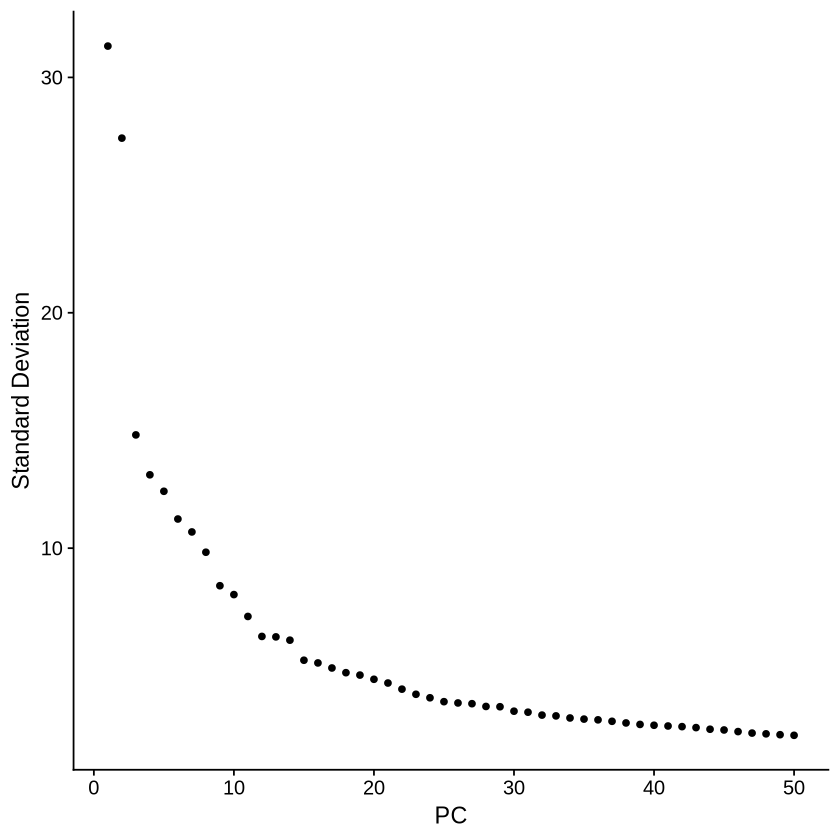

In [24]:
Cond_seurat <- RunPCA (Cond_seurat, verbose = FALSE)
ElbowPlot (Cond_seurat) # Take 50 ##CHANGEEEE

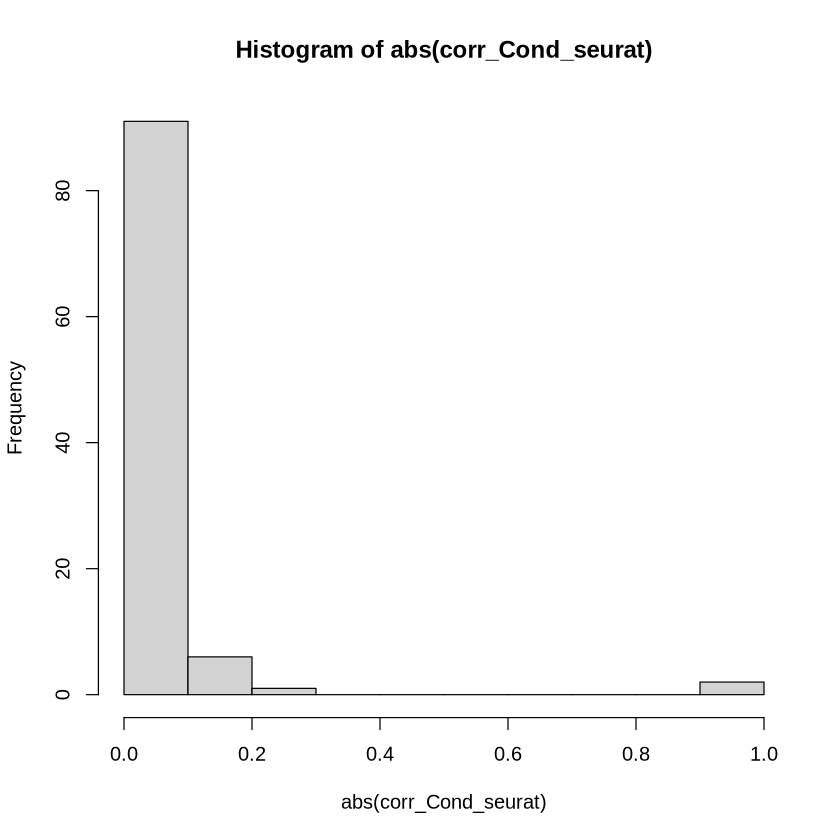

In [26]:
corr_Cond_seurat <- cor (Cond_seurat@meta.data [ , c("S.Score","G2M.Score")], Embeddings (Cond_seurat, "pca"))
hist(abs(corr_Cond_seurat))

In [27]:
remained_Cond_seurat <- abs(corr_Cond_seurat) < 0.2  

# Now we create an integer object to define which PCs should be used for downstream analysis (taking into account their correlation with CC scores)
# We take the columns (PCs) that have low correlation with S and G2M scores (TRUE in both rows)
idx_used_pcs_Cond_seurat <- which (colSums(remained_Cond_seurat) == 2)

In [28]:
Cond_seurat <- Cond_seurat %>% 
    RunTSNE (reduction = "pca", dims = c (intersect (1:50, idx_used_pcs_Cond_seurat))) %>% 
    FindNeighbors (reduction = "pca", dims = c (intersect (1:50, idx_used_pcs_Cond_seurat))) %>% 
    FindClusters (resolution = 0.5) %>% 
    identity()

Cond_seurat <- RunUMAP (Cond_seurat, reduction = "pca", dims = c (intersect (1:50, idx_used_pcs_Cond_seurat)))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 192
Number of edges: 6201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6575
Number of communities: 4
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:22:57 UMAP embedding parameters a = 0.9922 b = 1.112

10:22:57 Read 192 rows and found 48 numeric columns

10:22:57 Using Annoy for neighbor search, n_neighbors = 30

10:22:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:22:57 Writing NN index file to temp file /tmp/RtmpY9CXPK/file117f262902febb

10:22:57 Searching Annoy index using 1 thread, search_k = 3000

10:22:57 Annoy recall = 100%

10:22:58 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [130]:
### colorplattes

# Cell Line Colors
cols_Cell_Line <- list("WTC" = "#2088C9", "H9" = "#FFC502", "WIBJ2" = "#7171BC", "H1" = "#44AA99", "ESC" = "lightgray", "iPSC" = "lightgray", "HES3" = "#BC0F4D", "?" = "lightgray")

# Single Morphogen Colors
cols_SingleMorph <- list("Ctrl" = "#000000", "Control" = "#000000", "SHH" = "#F8A220", "RA" = "#D9E70D", "FGF8" = "#883EB6", "CHIR" = "#098684", 
                         "BMP4" = "#E6376C", "BMP7" = "#A34030", "CycA" = "#1B3BB1", "XAV939" = "#57FFF9", "?" = "lightgray")

# Morphogen Full Colors
Morphogen_full <- list("Ctrl" = "#000000", "SHH_A" = "#FFC370", "SHH_E" = "#FF990A", "RA_A" = "#E0EB47", "RA_E" = "#9BA512", 
                       "CHIR_A" = "#B0D4D4", "CHIR_E" = "#569F9E", "FGF8_late_A" = "#C7AED6", "FGF8_late_E" = "#8452A3",
                       "CHIR_tA" = "#FFB3C9", "CHIR_tC" = "#EC5B86", "CHIR_tE" = "#C7184C")


# Batch Colors
cols_Batch <- list("B1" = "#88CCEE", "B2" = "#DDCC77")

# Medium Colors
Medium <- list("NIM" = "#44C177", "NPM" = "#B7377E")

path_fig = ''


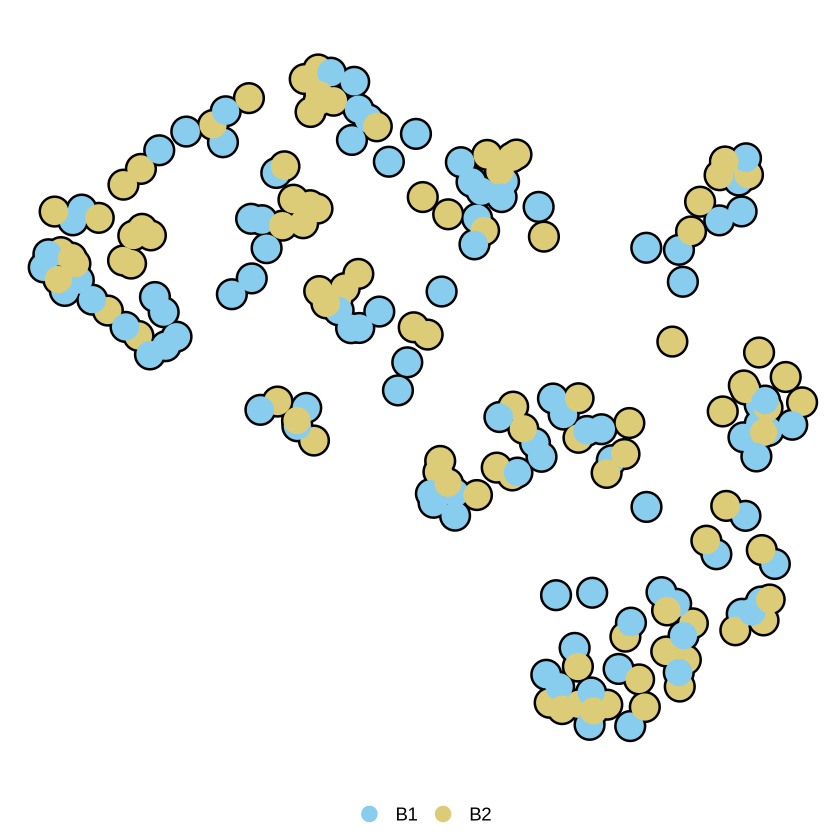

In [56]:
do_DimPlot (Cond_seurat, reduction = "umap", group.by = "batch", pt.size = 7,  colors.use = cols_Batch, border.size = 1.2)
ggsave(paste0(path_fig, "batch.png"), 
       width=8, height=8,dpi = 500)

In [58]:
saveRDS(Cond_seurat, paste0(path_data, 'exp1aggregated_seurat.rds'))

In [132]:
plotdf = as.data.frame(Embeddings(Cond_seurat[['umap']]))
plotdf['morphogen_full'] <- Cond_seurat$morphogen_full
plotdf['medium'] <- Cond_seurat$medium
plotdf['cell_line'] <- Cond_seurat$cell_line
plotdf<- plotdf %>% dplyr::mutate(Category = ifelse(morphogen_full == 'Ctrl', 'Ctrl', 'Trt'))
plotdf<- plotdf %>% dplyr::mutate(Stroke = ifelse(morphogen_full == 'Ctrl', 2.5, 0.5))
head(plotdf)

,UMAP_1,UMAP_2,morphogen_full,medium,cell_line,Category,Stroke
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>,<dbl>
CHIR_A_NIM_H1_B1,-4.7994595,1.616255398,CHIR_A,NIM,H1,Trt,0.5
CHIR_A_NIM_H1_B2,-5.0229226,1.716784592,CHIR_A,NIM,H1,Trt,0.5
CHIR_A_NIM_H9_B1,0.4515649,1.882361288,CHIR_A,NIM,H9,Trt,0.5
CHIR_A_NIM_H9_B2,0.4308645,2.176035757,CHIR_A,NIM,H9,Trt,0.5
CHIR_A_NIM_WIBJ2_B1,-0.7036467,-0.008974974,CHIR_A,NIM,WIBJ2,Trt,0.5
CHIR_A_NIM_WIBJ2_B2,-0.4541659,0.308372850,CHIR_A,NIM,WIBJ2,Trt,0.5


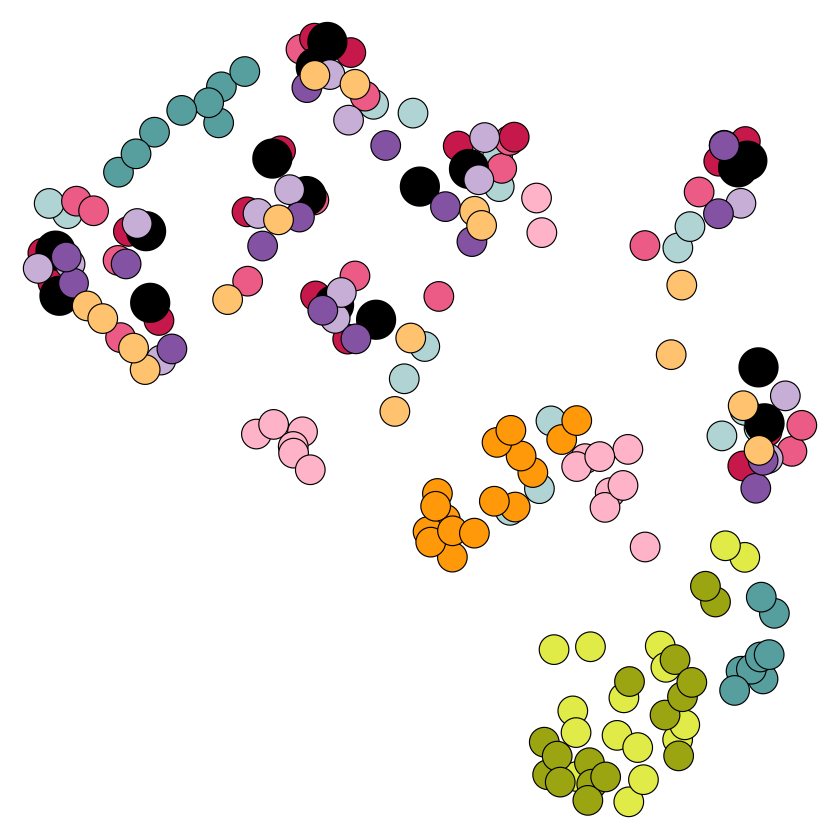

In [138]:
### Fig. 4k ###

 
custom_stroke_colors <- c("Trt" = "black", "Ctrl" = "#f5c34d")

ggplot(plotdf, aes(x = UMAP_1, y = UMAP_2, fill = morphogen_full, stroke = Stroke)) +
  geom_point(shape = 21,size=8) +  # Use shape 21 to allow fill and stroke
  scale_fill_manual(values = Morphogen_full) +  # Apply custom fill colors
  
  theme_void() +  # Removes axes, grid, and background
  theme(legend.position = "none")  # Removes the legend

ggsave(paste0(path_fig, "morphogen_full_v2.png"), 
       width=8, height=8,dpi = 500)

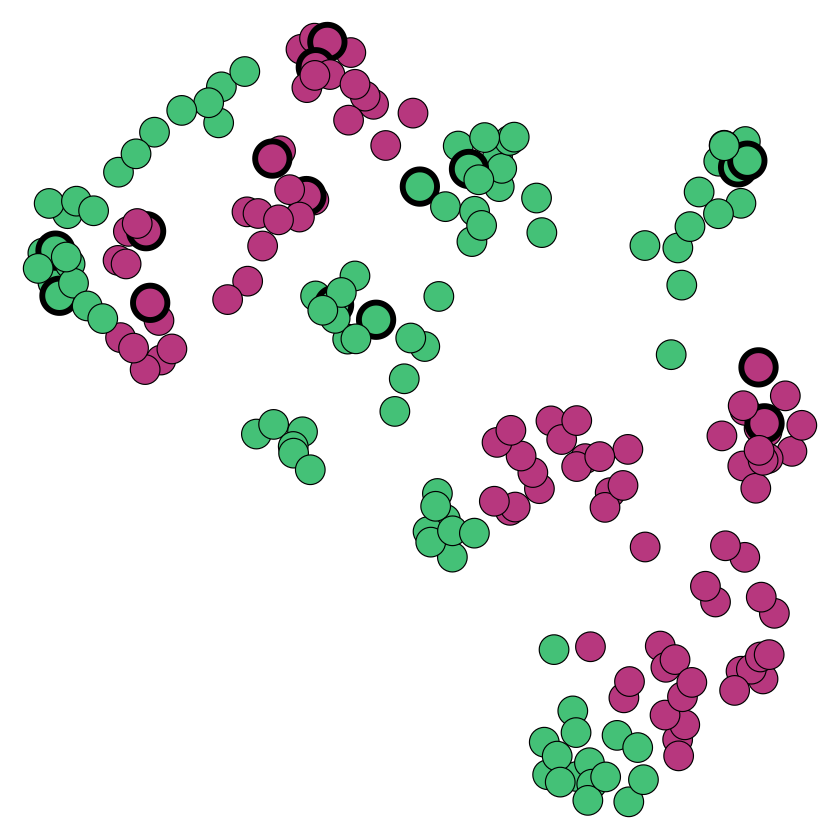

In [137]:
### Fig. 4k ###

Medium <- list("NIM" = "#44C177", "NPM" = "#B7377E")

custom_stroke_colors <- c("Trt" = "black", "Ctrl" = "black")
#
ggplot(plotdf, aes(x = UMAP_1, y = UMAP_2, fill = medium, color= Category,stroke = Stroke)) +
  geom_point(shape = 21,size=8,alpha =1) +  # Use shape 21 to allow fill and stroke
  scale_fill_manual(values = Medium) +  # Apply custom fill colors
  scale_color_manual(values = custom_stroke_colors)+
 
  
  theme_void() +  # Removes axes, grid, and background
  theme(legend.position = "none")  # Removes the legend

ggsave(paste0(path_fig, "medium_v2.png"), 
       width=8, height=8,dpi = 500)

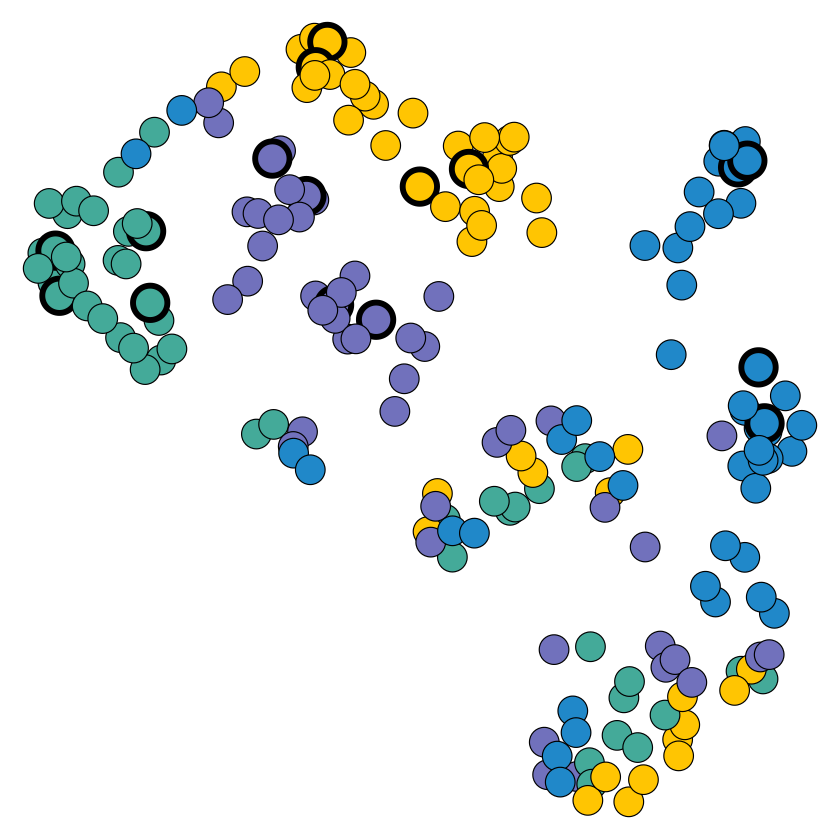

In [136]:
### Fig. 4k ###

 
custom_stroke_colors <- c("Trt" = "black", "Ctrl" = "black")
#
ggplot(plotdf, aes(x = UMAP_1, y = UMAP_2, fill = cell_line, color = Category, stroke = Stroke)) +
  geom_point(shape = 21,size=8,alpha =1) +  # Use shape 21 to allow fill and stroke
  scale_fill_manual(values = cols_Cell_Line) +  # Apply custom fill colors
  scale_color_manual(values = custom_stroke_colors)+
  #scale_size_continuous(range = c(0.5, 3)) +  # Adjust stroke sizes if needed
  
  theme_void() +  # Removes axes, grid, and background
  theme(legend.position = "none")  # Removes the legend

ggsave(paste0(path_fig, "cell_line_v2.png"), 
       width=8, height=8,dpi = 500)